<a href="https://colab.research.google.com/github/hermit7999/ML_basic/blob/main/7_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation system

1. Demographic Filtering(인구통계학적 필터링)
1. Content Based Filtering(컨텐츠 기반 필터링)
1. Collaborative Filttering(협업 필터링)

1. Demographic Filtering(인구 통계학적 필터링)

In [2]:
from google.colab import drive
mountpoint = '/sample_data'
drive.mount(mountpoint, force_remount = True)

Mounted at /sample_data


In [3]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('/content/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/tmdb_5000_movies.csv')

df1.head()
# df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
df1.shape, df2.shape

((4803, 4), (4803, 20))

In [6]:
df1['title'].equals(df2['title'])

True

In [7]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [8]:
df1.columns = ['id', 'title', 'cast', 'crew']
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [9]:
df1[['id', 'cast', 'crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [10]:
df2 = df2.merge(df1[['id', 'cast', 'crew']], on = 'id')
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


영화 1 : 영화의 평점이 10/10 -> 5명이 평가함
영화 2 : 영화의 평점이 8/10 -> 500 명이 평가함

In [11]:
c = df2['vote_average'].mean()
c

6.092171559442016

In [12]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [13]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 22)

In [14]:
q_movies['vote_count'].sort_values()

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [15]:
def weighted_rating(x, m = m, c = c):
  v = x['vote_count']
  r = x['vote_average']
  return (v/(v+m) * r) + (m / (m+v)*c)

In [16]:
q_movies['score'] = q_movies.apply(weighted_rating, axis= 1)
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [17]:
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

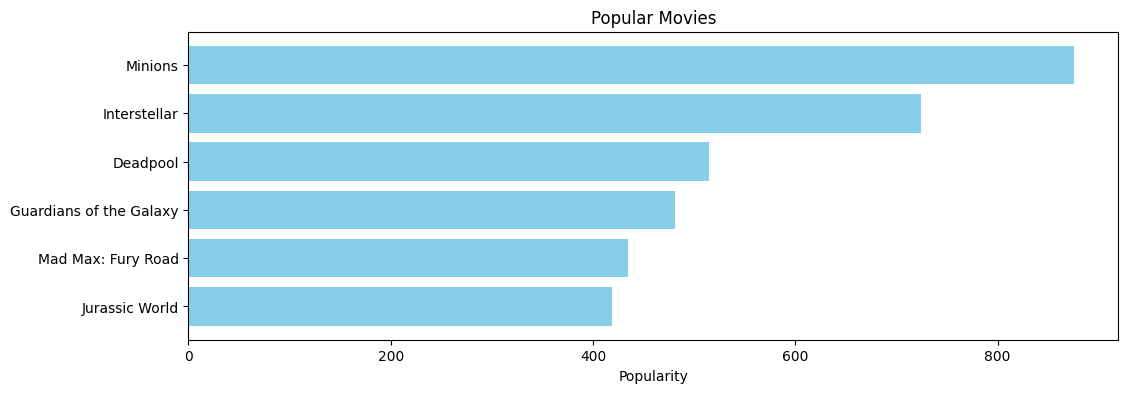

In [18]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# 2. Content Based Filtering(컨텐츠 기반 필터링)
## (줄거리 기반 필터링)

In [19]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Bag of Words - BOW

문장 1: I am a boy
문장 2: I am a girl
I(2), am(@), a(2), boy(1), girl(1)
       I  am    a   boy   girl
문장1   1 1   1   1   0
문장2   1  1   1   0   1
Feature vectoring
문서 100 개 가 있을때
모든 문서에서 나온 단어 10,000 rofkaus
100 * 10000 = 100만개의 단어가 생성됨

1. TfidfVectorizer(TF-IDF 기반의 벡터화)
2. CountVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

In [22]:
df2['overview'].isnull().values.any() # overview 에 null 값이 있음

True

In [24]:
df2['overview'] = df2['overview'].fillna('') # Null 값을 찾아서 빈 값으로 채워 줌

In [25]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [26]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

|1문장|2문장|3문장|
|---|---|---|---|
|문장1|1|0.3|0.8|
|문장2|0.3|1|0.5|
|문장3|0.8|0.5|1|

In [30]:
cosine_sim.shape

(4803, 4803)

In [31]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [32]:
indices['Avatar']

0

In [33]:
df2.iloc[3] # index 3에 대한 movie 정보를 얻어옮

budget                                                          250000000
genres                  [{"id": 28, "name": "Action"}, {"id": 80, "nam...
homepage                               http://www.thedarkknightrises.com/
id                                                                  49026
keywords                [{"id": 849, "name": "dc comics"}, {"id": 853,...
original_language                                                      en
original_title                                      The Dark Knight Rises
overview                Following the death of District Attorney Harve...
popularity                                                      112.31295
production_companies    [{"name": "Legendary Pictures", "id": 923}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2012-07-16
revenue                                                        1084939099
runtime                               

# 영화의 제목을 입력 받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반

In [49]:
def get_recommendations(title, cosine_sim=cosine_sim):
  idx = indices[title]
  # 코사인 유사도 매트릭스 에서 index에 해당하는 데이터를 (idx, 유사도)형태로 얻기
  sim_scores = list(enumerate(cosine_sim[3]))

  # 코사인 유사도 기준으로 내림차순 정렬
  sim_scores = sorted(test_sim, key=lambda x : x[1], reverse=True)

  # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱
  sim_scores = sim_scores[1:11]

  #추천 영화 목록 10개의 인텍스 정보 추출
  movie_indices = [i[0] for i in sim_scores]

  #인텍스 정보를 통해 영화 제목 추출
  return df2['title'].iloc[movie_indices]

In [35]:
test_idx = indices['Avatar']
test_idx

0

In [36]:
cosine_sim[3]

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

In [39]:
test_sim = list(enumerate(cosine_sim[3])) # 코사인 유사도 매트릭스 에서 index에 해당하는 데이터를 (idx, 유사도)형태로 얻기

In [45]:
test_sim_scores = sorted(test_sim, key=lambda x : x[1], reverse=True) # 코사인 유사도 기준으로 내림차순 정렬
test_sim_scores[1:11] # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱

[(65, 0.30151176591665485),
 (299, 0.29857045255396825),
 (428, 0.2878505467001694),
 (1359, 0.264460923827995),
 (3854, 0.18545003006561456),
 (119, 0.16799626199850706),
 (2507, 0.16682891043358278),
 (9, 0.1337400906655523),
 (1181, 0.13219702138476813),
 (210, 0.13045537014449818)]

In [43]:
def get_second(x):
  return x[1]

lst = ['index', '유사도']
get_second(lst)

'유사도'

In [44]:
(lambda x:x[1])(lst)

'유사도'

# 추천 영화 목록 10 개의 인텍스 정보 추가


In [ ]:
#추천 영화 목록 10개의 인텍스 정보 추출
test_movie_indices = [i[0] for i in test_sim_scores]
test_movie_indices

In [48]:
#인텍스 정보를 통해 영화 제목 추출
df2['title'].iloc[test_movie_indices]

3       The Dark Knight Rises
65            The Dark Knight
299            Batman Forever
428            Batman Returns
1359                   Batman
                ...          
4795                     Bang
4796                   Primer
4797                   Cavite
4798              El Mariachi
4799                Newlyweds
Name: title, Length: 4803, dtype: object

In [50]:
df2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [52]:
get_recommendations('Avengers: Age of Ultron')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

## 다양한 요소 기반 추천(장르, 감독, 키워드 등)

In [53]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [56]:
df2.loc[0,'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [58]:
s1 = [{"id": 28, "name": "Action"}]
s2 = '[{"id": 28, "name": "Action"}]'

In [59]:
type(s1), type(s2)

(list, str)

In [60]:
# String 을 List type 으로 변경함.
from ast import literal_eval
s2 = literal_eval(s2)
s2, type(s2)

([{'id': 28, 'name': 'Action'}], list)

In [62]:
features = ['cast', 'crew', 'keywords','genres']
for feature in features:
  df2[feature] = df2[feature].apply(literal_eval)

In [ ]:
df2.loc[0, 'crew']

In [64]:
# 감독 정보를 추출
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
  return np.nan

In [66]:
df2['director'] = df2['crew'].apply(get_director)
df2['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [68]:
df2[df2['director'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,diector,director
3661,0,"[{'id': 18, 'name': 'Drama'}]",NaN,19615,[],en,Flying By,A real estate developer goes to his 25th high ...,1.546169,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's about the music,Flying By,7.0,2,"[{'cast_id': 1, 'character': 'George', 'credit...",[],NaN,NaN
3670,0,"[{'id': 10751, 'name': 'Family'}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,[],Released,NaN,Running Forever,0.0,0,[],[],NaN,NaN
3729,3250000,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.paathefilm.com/,26379,[],en,Paa,He suffers from a progeria like syndrome. Ment...,2.126139,"[{""name"": ""A B Corp"", ""id"": 4502}]",...,"[{""iso_639_1"": ""hi"", ""name"": ""\u0939\u093f\u09...",Released,NaN,Paa,6.6,19,"[{'cast_id': 1, 'character': 'Auro', 'credit_i...","[{'credit_id': '52fe44fec3a368484e042a29', 'de...",NaN,NaN
3977,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,55831,"[{'id': 10183, 'name': 'independent film'}]",en,Boynton Beach Club,A handful of men and women of a certain age pi...,0.188870,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Boynton Beach Club,6.8,3,"[{'cast_id': 1, 'character': 'Marilyn', 'credi...",[],NaN,NaN
4068,0,[],NaN,371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],...,[],Released,NaN,Sharkskin,0.0,0,[],[],NaN,NaN
4105,2000000,[],NaN,48382,[],en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.031947,[],...,[],Released,"2600 years ago, one family began a remarkable ...","The Book of Mormon Movie, Volume 1: The Journey",5.0,2,"[{'cast_id': 1, 'character': 'Sam', 'credit_id...",[],NaN,NaN
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],...,[],Released,NaN,Hum To Mohabbat Karega,0.0,0,[],[],NaN,NaN
4123,7000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.roadsideromeo.com/,20653,[],en,Roadside Romeo,This is the story of Romeo. A dude who was liv...,0.253595,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Roadside Romeo,6.7,3,"[{'cast_id': 1, 'character': 'Romeo', 'credit_...",[],NaN,NaN
4247,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[],NaN,NaN
4305,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,114065,[],en,Down & Out With The Dolls,"The raunchy, spunky tale of the rise and fall ...",0.002386,[],...,[],Released,Ain't Rock 'N' Roll a bitch.,Down & Out With The Dolls,0.0,0,[],[],NaN,NaN


In [72]:
df2.loc[0, 'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [ ]:
df2.loc[0,'genres']

In [ ]:
df2.loc[0, 'keywords']

In [74]:
# 처음 3개의 데이터 중에서 name 에 해당하는 value 만 추출
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    if len(names) > 3:
        names = names[:3]
    return names
  return []

In [75]:
features = ['cast', 'keywords', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(get_list)

In [76]:
df2[['title', 'cast', 'director','keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [77]:
def clean_data(x):
  if isinstance(x, list):
    return [str.lower(i.replace(' ','')) for i in x]
  else:
    if isinstance(x, str):
      return str.lower(x.replace(' ', ''))
    else:
        return ''

In [79]:
features = ['cast', 'keywords', 'genres', 'director']
for feature in features:
  df2[feature] = df2[feature].apply(clean_data)

In [82]:
df2[['title', 'cast', 'director','keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [83]:
def create_soup(x):
  return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis = 1)
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object